Checking files in data/processed/subj01...
[OK] train_fmri_avg.npy: shape=(9000, 15724), dtype=float32
[OK] test_fmri_avg.npy: shape=(1000, 15724), dtype=float32
[OK] train_imgIds.npy: shape=(9000,), dtype=int32
[OK] test_imgIds.npy: shape=(1000,), dtype=int32
[OK] train_clip_vitl14.npy: shape=(9000, 768), dtype=float16
[OK] test_clip_vitl14.npy: shape=(1000, 768), dtype=float16

Train Count: 9000
Shape & Alignment Verified.

--- fMRI Train Stats (Averaged) ---
Min: -4.071, Max: 4.376
Mean: 0.002, Std: 0.645
Exact Zeros: 393120 (0.28%) -> Should be near 0%


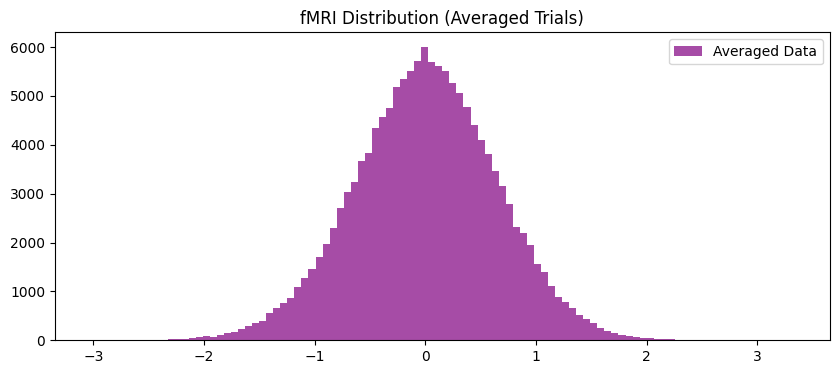

In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt

data_dir = "data/processed/subj01"
# Note: Loading '_avg' files now
files = [
    "train_fmri_avg.npy", "test_fmri_avg.npy",
    "train_imgIds.npy", "test_imgIds.npy",
    "train_clip_vitl14.npy", "test_clip_vitl14.npy"
]

print(f"Checking files in {data_dir}...")
data = {}
for f in files:
    path = os.path.join(data_dir, f)
    if os.path.exists(path):
        try:
            data[f] = np.load(path)
            print(f"[OK] {f}: shape={data[f].shape}, dtype={data[f].dtype}")
        except Exception as e:
            print(f"[FAIL] {f}: {e}")
    else:
        print(f"[MISSING] {f}")

# 1. Verify Shapes & Alignment
fmri_tr = data.get("train_fmri_avg.npy")
clip_tr = data.get("train_clip_vitl14.npy")
ids_tr = data.get("train_imgIds.npy")

if fmri_tr is not None and clip_tr is not None:
    n_train = fmri_tr.shape[0]
    print(f"\nTrain Count: {n_train}")
    
    # Verify fMRI is strictly 2D now (N, V)
    assert len(fmri_tr.shape) == 2, f"fMRI should be 2D, got {fmri_tr.shape}"
    assert fmri_tr.shape[1] == 15724, f"Voxel dim mismatch: {fmri_tr.shape[1]}"
    
    assert clip_tr.shape[0] == n_train, f"CLIP count mismatch: {clip_tr.shape[0]}"
    assert ids_tr.shape[0] == n_train, f"IDs count mismatch: {ids_tr.shape[0]}"
    print("Shape & Alignment Verified.")

# 2. Check for Zero Spike & Stats
if fmri_tr is not None:
    print("\n--- fMRI Train Stats (Averaged) ---")
    print(f"Min: {fmri_tr.min():.3f}, Max: {fmri_tr.max():.3f}")
    print(f"Mean: {fmri_tr.mean():.3f}, Std: {fmri_tr.std():.3f}")
    
    n_zeros = (fmri_tr == 0).sum()
    print(f"Exact Zeros: {n_zeros} ({n_zeros/fmri_tr.size*100:.2f}%) -> Should be near 0%")

    # 3. Visualization
    plt.figure(figsize=(10, 4))
    plt.hist(fmri_tr.flatten()[::1000], bins=100, color='purple', alpha=0.7, label='Averaged Data')
    plt.title("fMRI Distribution (Averaged Trials)")
    plt.legend()
    plt.show()